<a href="https://colab.research.google.com/github/YoishD/Data-Science-B7/blob/main/YeshDakpU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The United States decides their presidency based on electoral votes, essentially each states gets an elector based off the number of represenatives in the House of Representatives they have. Typically states have a "winner takes all" mentality, meaning the candidate with the higher votes will be the choice that all electors of that state will choose, but ultimatley this will change State by State, as Maine and Nebraska each have a variation of “proportional representation. Typically these electors either vote for the Democrat or Republic parties, however their are no regulations against voting for a third party.
Note: This model is also flawed as it fails to take in the prior of each state indvidually, a better model would have multiple different priors for each state, but this rudimentary model works for now.

What will be the % of electoral votes that favor the democratic party?


In [1]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


In [2]:
import preliz as pz


In [3]:
import numpy as np
import arviz as az
import pymc as pm

<Axes: >

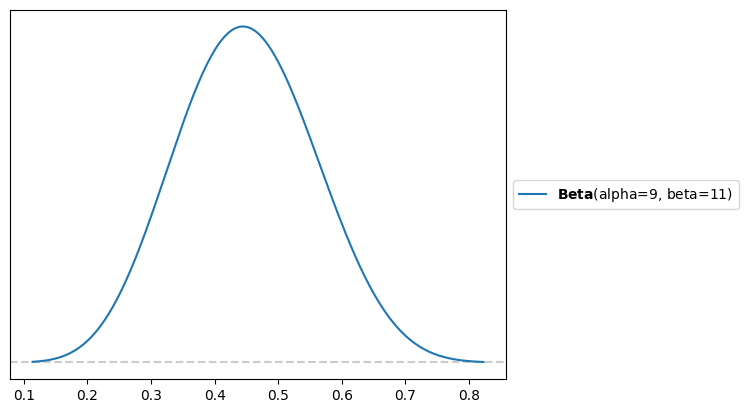

In [30]:
pz.Beta(alpha=9,beta=11).plot_pdf()
#plotting the beta distribution


In [42]:
Gore_prior = pz.Beta(alpha=9,beta=11)
#Originally this prior was based off of the election results for 2000, causing me to have a fairly resistant prior, which skewed my data. I then on advice from Mr.A, changed my prior to use significantly smaller numbers.
Gore_prior_mode = (Gore_prior.alpha - 1)/(Gore_prior.alpha + Gore_prior.beta - 2)
#You have to use the above formula becasue preliz does not have a function that returns the mode, so You have to
#use a formula
Gore_prior.mean(),

(0.45,)

The prior is based off of my experience with past presidency race, with the distributions between voters often being quite even between both the democratic and republican party, however recent 2024 debates reveals flaws within the republican canidate, favoring the democrats. This leads me to my prior of 9/20 total number of electors will favor the democratic party.
Note: 11/20 represents the total number of votes for any other party not just the republican party, so electoral votes for third parties like the green party would be in this 11/20.

<Axes: >

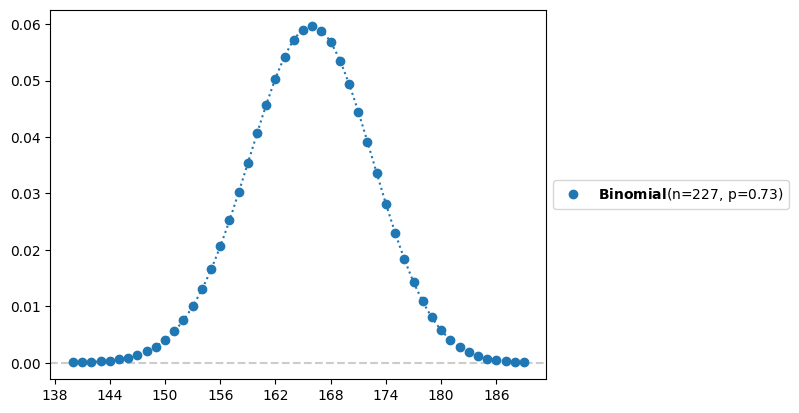

In [43]:
pz.Binomial(n = 227, p = 227/311 ).plot_pdf()
#Binomial distribution of the Likelihood/ 2016 electoral college
#Originally our likelihood was simply Democratic votes versus republican, but then i realized that their was a discrepancy caused by third party votes, which I then was able to include by changing it to include all non democratic votes instead of just republican votes

In [46]:
DEM_Hill = np.repeat(1, 227)
Non_Dem = np.repeat(0, 311)
Sixteen_data = np.concatenate( [DEM_Hill,Non_Dem] )
#All of our electoral votes are now in one array for the 2016 electoral college

with pm.Model() as DEM_Vote_Model:
    θ = pm.Beta('θ' , alpha = 9. , beta = 11.)
      #Our defined prior from the 2000 electoral college results
    y = pm.Bernoulli('y', p = θ, observed = Sixteen_data)
      # Defined our likelihood from the 2016 electoral college
    idata_FT = pm.sample(538)
      #Creates an array that we can use to help visualize data for later. I previously wanted to use 1000, but changed it to be specifically 538, so it showcased the total number of votes for the democratic party for the next election instead of number of democratic votes out of 1000, as 538 is the number of electors/possible votes





In [47]:
import arviz as az
pm.sample_posterior_predictive(idata_FT, model=DEM_Vote_Model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: title={'center': 'θ'}>

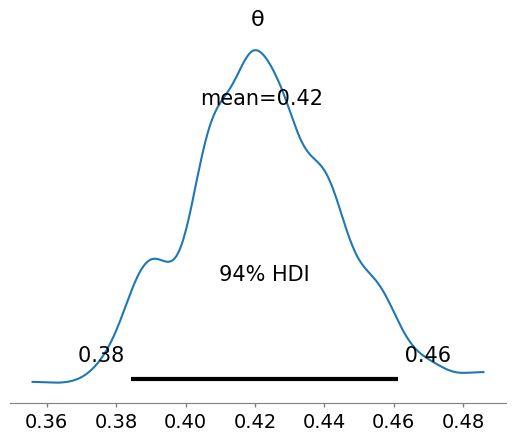

In [48]:
az.plot_posterior(idata_FT)

I personally feel that the mean works, and I am personally not really surpised with this posterior. It being 0.42 represents that the democratic party doesn't hold any majority, which is representative of past elections, with results often being split. Recently, third parties have gotten more and more popular, especially on social media,so I wouldn't be surprised with more electors voting third party, I also feel as results of the September 10 debate, was also big for alot of undecided voters, as both candiates showcased traits that would turn voters to one side or another. The Democrat candidate showcased alot of indecisiveness regarding certain policies, and the Republican candidate showcased a general sense of ineptitude, needing constant fact checking regarding his claims.

In [49]:
stacked_FT = az.extract(idata_FT, group="posterior_predictive")
Pred = stacked_FT.sel(sample=0).sel(draw=0).y.to_series().values
#Future electoral voting prediction in the form of an array
Pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [50]:
Dem_VotesPred = sum(Pred)
Dem_VotesPred
# I just summed up the array to get a total number of Democratic Votes

238